#### Posterior predictive checks of shrimp model
#### Objective:
Run posterior predictive checks on Shrimp model

#### Methods
Sample from the posterior distribution and plot distribution the distribution of simulated results versus the obersved ones

#### Results:
 - Model predictions match the observed data
 
#### Conclusions
 - Our model correctly captures the observed probability of a positive farm
 - It is well specified

Import require R packages: bayesplot and dplyr

In [1]:
library(bayesplot)

library(dplyr)

This is bayesplot version 1.4.0
- Plotting theme set to bayesplot::theme_default()
- Online documentation at mc-stan.org/bayesplot


Reading in the data

Posterior distribution

In [37]:
post <- readRDS('postm1.1.rds')

Data used for fitting the model

In [4]:
df <- read.csv('Bayeshrimp_exploration_files/EJs.csv')

In [8]:
str(df)

'data.frame':	270 obs. of  10 variables:
 $ X   : int  1 3 4 5 7 9 11 12 14 16 ...
 $ JLSA: Factor w/ 10 levels "Ahome","Angostura",..: 2 3 10 9 1 7 1 3 1 1 ...
 $ I22 : int  1 0 0 1 0 0 0 0 0 0 ...
 $ I25 : int  1 1 0 1 0 1 0 1 0 0 ...
 $ D5  : int  0 1 1 1 1 1 1 1 1 1 ...
 $ I24 : int  1 0 0 1 0 0 0 0 0 0 ...
 $ A10 : int  0 2 2 2 2 2 2 0 2 2 ...
 $ A9  : int  0 1 2 2 2 0 1 1 1 1 ...
 $ B3  : int  1 1 0 1 1 0 1 0 1 1 ...
 $ H6  : int  1 0 0 1 0 0 0 0 1 0 ...


In [38]:
str(post)

List of 15
 $ a_JSLA_raw: num [1:8000, 1:10] -0.472 -0.853 -0.566 -1.201 -1.373 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ a         : num [1:8000(1d)] -0.438 0.294 -0.915 0.681 -0.4 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ sigma_JSLA: num [1:8000(1d)] 1.299 1.427 1.185 0.957 0.997 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ b5        : num [1:8000(1d)] 0.0489 -0.35622 0.00246 0.27434 0.24367 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ bd        : num [1:8000(1d)] -1.097 -1.984 -2.323 -1.898 -0.865 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ b2        : num [1:8000(1d)] 0.451 0.909 0.896 0.713 0.203 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ b4        : num [1:8000(1d)] 1.168 0.604 0.767 0.248 0.951 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ ba        : num [1:8000(1d)] -0.329 0.209

Creating a table with the proportion of positives per JLSA

In [32]:
df_by_jsla <- df %>% group_by(JLSA)
prevalence = df_by_jsla %>% summarise(prev = mean(as.integer(H6)))

In [26]:
prevalence = table(df$JLSA, df$H6)

In [33]:
prevalence

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1

JLSA,prev
Ahome,0.18032787
Angostura,0.77777778
Eldorado,0.57142857
Escuinapa,0.40000000
Guasave Norte,0.88000000
Guasave Sur,0.64516129
Mazatln-San Ignacio,0.04545455
Navolato Norte,0.61111111
Navolato Sur,0.85714286
Rosario,0.07692308


Merging posterior with farm/JLSA data frame

In [39]:
str(df)

'data.frame':	270 obs. of  10 variables:
 $ X   : int  1 3 4 5 7 9 11 12 14 16 ...
 $ JLSA: Factor w/ 10 levels "Ahome","Angostura",..: 2 3 10 9 1 7 1 3 1 1 ...
 $ I22 : int  1 0 0 1 0 0 0 0 0 0 ...
 $ I25 : int  1 1 0 1 0 1 0 1 0 0 ...
 $ D5  : int  0 1 1 1 1 1 1 1 1 1 ...
 $ I24 : int  1 0 0 1 0 0 0 0 0 0 ...
 $ A10 : int  0 2 2 2 2 2 2 0 2 2 ...
 $ A9  : int  0 1 2 2 2 0 1 1 1 1 ...
 $ B3  : int  1 1 0 1 1 0 1 0 1 1 ...
 $ H6  : int  1 0 0 1 0 0 0 0 1 0 ...


In [40]:
str(post$y_sim)

 num [1:8000, 1:270] 0 1 1 0 1 1 1 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ iterations: NULL
  ..$           : NULL


Need to transpose y_sim

In [50]:
kk <- data.frame(t(post$y_sim))

In [51]:
str(kk)

'data.frame':	270 obs. of  8000 variables:
 $ X1   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ X2   : num  1 0 0 1 0 0 0 1 0 0 ...
 $ X3   : num  1 0 0 1 0 0 0 0 1 0 ...
 $ X4   : num  0 1 0 1 0 0 0 0 0 0 ...
 $ X5   : num  1 0 0 1 0 0 0 0 0 0 ...
 $ X6   : num  1 0 0 1 0 0 0 0 0 0 ...
 $ X7   : num  1 0 0 1 0 0 1 0 0 1 ...
 $ X8   : num  1 1 0 1 0 0 0 1 0 0 ...
 $ X9   : num  1 1 0 1 0 0 0 0 0 0 ...
 $ X10  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ X11  : num  1 0 0 1 1 0 1 0 0 0 ...
 $ X12  : num  1 0 0 1 1 0 0 1 0 0 ...
 $ X13  : num  1 1 0 1 0 0 0 0 0 0 ...
 $ X14  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ X15  : num  1 1 0 1 0 0 0 1 0 0 ...
 $ X16  : num  1 1 0 1 0 0 0 0 0 0 ...
 $ X17  : num  0 0 0 1 0 1 0 0 0 0 ...
 $ X18  : num  1 0 0 1 0 0 0 1 1 0 ...
 $ X19  : num  1 1 0 1 1 0 0 0 0 0 ...
 $ X20  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ X21  : num  1 1 0 1 0 0 0 0 0 0 ...
 $ X22  : num  0 1 0 1 0 0 0 0 0 1 ...
 $ X23  : num  1 0 0 1 0 0 0 0 0 0 ...
 $ X24  : num  1 0 0 1 0 0 0 1 0 0 ...
 $ X25  : num  1 0 0 

In [52]:
kk$JLSA <- df$JLSA

In [54]:
tail(kk)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X7992,X7993,X7994,X7995,X7996,X7997,X7998,X7999,X8000,JLSA
265,1,1,0,0,1,1,1,1,0,0,⋯,1,1,1,1,1,1,0,1,1,Navolato Sur
266,1,1,1,1,1,1,0,1,0,0,⋯,1,1,1,1,0,1,1,1,1,Navolato Sur
267,0,1,1,1,1,1,1,1,0,1,⋯,1,1,1,1,1,1,1,1,1,Navolato Sur
268,1,1,1,1,0,1,1,1,0,1,⋯,1,1,1,1,0,1,1,1,0,Navolato Sur
269,1,1,0,0,1,0,1,1,0,0,⋯,1,1,1,1,0,0,0,0,0,Navolato Sur
270,0,0,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,Mazatl<e0>n-San Ignacio


Group by JLSA and get the mean for each column. This are the prevalences I will be plotting

In [57]:
sim_by_jlsa <- kk %>% group_by(JLSA)

In [59]:
sim_prev = sim_by_jlsa %>% summarise_all(funs(mean))

In [60]:
head(sim_prev)

JLSA,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X7991,X7992,X7993,X7994,X7995,X7996,X7997,X7998,X7999,X8000
Ahome,0.1311475,0.1639344,0.1639344,0.1639344,0.1967213,0.1639344,0.2622951,0.1967213,0.1967213,⋯,0.2786885,0.1803279,0.1475410,0.1803279,0.09836066,0.1311475,0.1147541,0.3114754,0.1475410,0.1147541
Angostura,0.8148148,0.7037037,0.7777778,0.6666667,0.9629630,0.7407407,0.8888889,0.8888889,0.9629630,⋯,0.7777778,0.7777778,0.8888889,0.8518519,0.70370370,0.7407407,0.6666667,0.7407407,0.8518519,0.7037037
Eldorado,0.3714286,0.6857143,0.5428571,0.3714286,0.6000000,0.4857143,0.3142857,0.6285714,0.5714286,⋯,0.6571429,0.6000000,0.5428571,0.5142857,0.40000000,0.4857143,0.6285714,0.5714286,0.6000000,0.6571429
Escuinapa,0.5000000,0.2000000,0.2000000,0.7000000,0.5000000,0.4000000,0.5000000,0.7000000,0.5000000,⋯,0.1000000,0.2000000,0.3000000,0.4000000,0.40000000,0.3000000,0.5000000,0.3000000,0.1000000,0.7000000
Guasave Norte,0.9600000,0.9600000,0.8400000,0.8000000,0.9600000,0.7600000,0.8000000,0.8400000,0.9200000,⋯,0.6800000,0.8400000,0.8400000,0.6800000,0.72000000,0.8000000,0.8400000,0.9600000,0.9600000,1.0000000
Guasave Sur,0.7096774,0.5806452,0.6129032,0.4516129,0.5483871,0.6451613,0.7419355,0.7741935,0.4516129,⋯,0.7419355,0.7419355,0.6774194,0.6129032,0.67741935,0.6774194,0.7741935,0.5806452,0.7419355,0.7096774


Transform to matrix

In [64]:
sim_matrix <- data.matrix(sim_prev)

In [65]:
str(sim_matrix)

 num [1:10, 1:8001] 1 2 3 4 5 6 7 8 9 10 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:8001] "JLSA" "X1" "X2" "X3" ...


Transpose back

In [76]:
sim_matrix

JLSA,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X7991,X7992,X7993,X7994,X7995,X7996,X7997,X7998,X7999,X8000
1,0.13114754,0.1639344,0.16393443,0.1639344,0.1967213,0.1639344,0.26229508,0.19672131,0.1967213,⋯,0.27868852,0.1803279,0.14754098,0.1803279,0.09836066,0.1311475,0.1147541,0.31147541,0.1475410,0.11475410
2,0.81481481,0.7037037,0.77777778,0.6666667,0.9629630,0.7407407,0.88888889,0.88888889,0.9629630,⋯,0.77777778,0.7777778,0.88888889,0.8518519,0.70370370,0.7407407,0.6666667,0.74074074,0.8518519,0.70370370
3,0.37142857,0.6857143,0.54285714,0.3714286,0.6000000,0.4857143,0.31428571,0.62857143,0.5714286,⋯,0.65714286,0.6000000,0.54285714,0.5142857,0.40000000,0.4857143,0.6285714,0.57142857,0.6000000,0.65714286
4,0.50000000,0.2000000,0.20000000,0.7000000,0.5000000,0.4000000,0.50000000,0.70000000,0.5000000,⋯,0.10000000,0.2000000,0.30000000,0.4000000,0.40000000,0.3000000,0.5000000,0.30000000,0.1000000,0.70000000
5,0.96000000,0.9600000,0.84000000,0.8000000,0.9600000,0.7600000,0.80000000,0.84000000,0.9200000,⋯,0.68000000,0.8400000,0.84000000,0.6800000,0.72000000,0.8000000,0.8400000,0.96000000,0.9600000,1.00000000
6,0.70967742,0.5806452,0.61290323,0.4516129,0.5483871,0.6451613,0.74193548,0.77419355,0.4516129,⋯,0.74193548,0.7419355,0.67741935,0.6129032,0.67741935,0.6774194,0.7741935,0.58064516,0.7419355,0.70967742
7,0.00000000,0.1363636,0.09090909,0.1818182,0.2727273,0.1818182,0.09090909,0.04545455,0.1363636,⋯,0.04545455,0.0000000,0.09090909,0.0000000,0.09090909,0.4090909,0.1363636,0.09090909,0.1363636,0.00000000
8,0.50000000,0.6111111,0.77777778,0.3888889,0.7222222,0.5555556,0.66666667,0.77777778,0.6111111,⋯,0.83333333,0.6111111,0.50000000,0.5555556,0.55555556,0.7777778,0.8333333,0.61111111,0.7777778,0.27777778
9,0.89285714,0.8571429,0.82142857,0.8214286,0.8928571,0.7500000,0.85714286,0.96428571,0.5714286,⋯,0.71428571,0.8571429,0.92857143,0.7857143,0.85714286,0.7142857,0.9285714,0.78571429,0.9642857,0.71428571
10,0.07692308,0.1538462,0.23076923,0.0000000,0.0000000,0.1538462,0.07692308,0.38461538,0.1538462,⋯,0.07692308,0.0000000,0.23076923,0.2307692,0.00000000,0.1538462,0.2307692,0.07692308,0.2307692,0.07692308


In [77]:
sim_matrix_t <- t(sim_matrix[,-1])

Summary statistics of simulated prevalence for each geographical area

In [79]:
summary(sim_matrix_t)

       V1               V2               V3               V4       
 Min.   :0.0000   Min.   :0.3333   Min.   :0.2286   Min.   :0.000  
 1st Qu.:0.1475   1st Qu.:0.7037   1st Qu.:0.4857   1st Qu.:0.300  
 Median :0.1967   Median :0.7778   Median :0.5714   Median :0.400  
 Mean   :0.1933   Mean   :0.7751   Mean   :0.5645   Mean   :0.395  
 3rd Qu.:0.2295   3rd Qu.:0.8519   3rd Qu.:0.6286   3rd Qu.:0.500  
 Max.   :0.4590   Max.   :1.0000   Max.   :0.8571   Max.   :1.000  
       V5               V6               V7                V8        
 Min.   :0.3600   Min.   :0.2258   Min.   :0.00000   Min.   :0.1111  
 1st Qu.:0.7600   1st Qu.:0.5806   1st Qu.:0.04545   1st Qu.:0.5556  
 Median :0.8400   Median :0.6452   Median :0.09091   Median :0.6111  
 Mean   :0.8314   Mean   :0.6422   Mean   :0.10432   Mean   :0.6341  
 3rd Qu.:0.9200   3rd Qu.:0.7097   3rd Qu.:0.13636   3rd Qu.:0.7222  
 Max.   :1.0000   Max.   :0.9677   Max.   :0.54545   Max.   :1.0000  
       V9              V10        

In [33]:
prevalence

Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 1

JLSA,prev
Ahome,0.18032787
Angostura,0.77777778
Eldorado,0.57142857
Escuinapa,0.40000000
Guasave Norte,0.88000000
Guasave Sur,0.64516129
Mazatln-San Ignacio,0.04545455
Navolato Norte,0.61111111
Navolato Sur,0.85714286
Rosario,0.07692308


It looks good

#### Plotting it

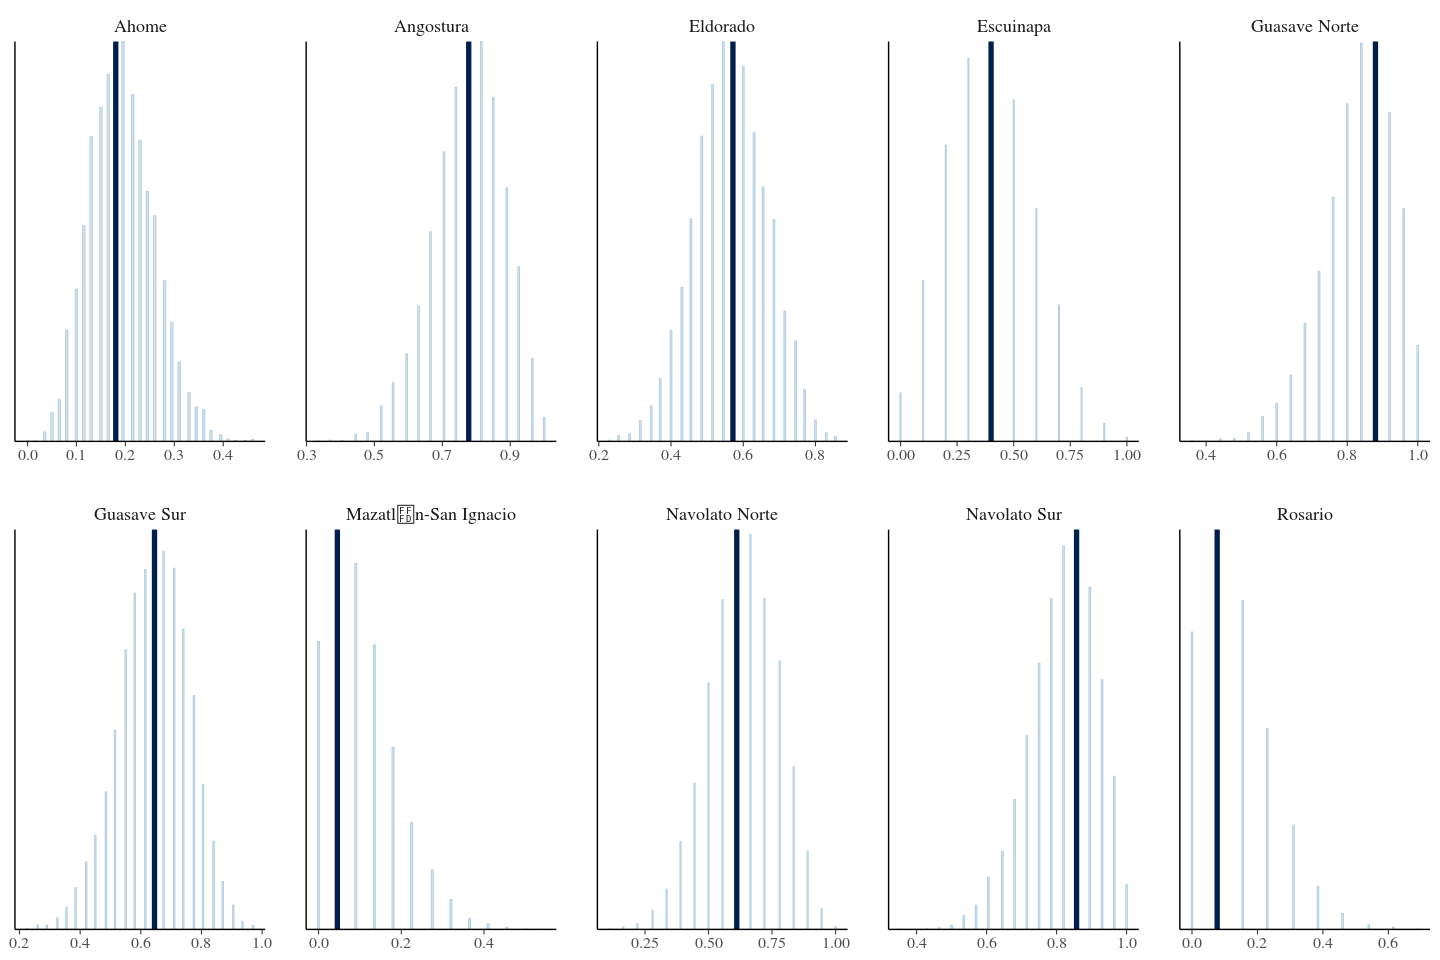

In [108]:
options(repr.plot.width = 12, repr.plot.height = 8)
ppc_stat_grouped(prevalence$prev, sim_matrix_t, group = prevalence$JLSA, stat = "mean", 
                 facet_args = list(ncol=5), binwidth = 0.005) + legend_none()

It looks good. The end